In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

data = pd.read_pickle('./data.pkl')
data.head(10)

Symbols,EIMI.MI,IMEU.MI,SJPA.MI,CSPX.AS
2015-01-01,NaN,NaN,NaN,NaN
2015-01-02,19.299999,21.405001,25.209999,156.289993
2015-01-05,19.219999,20.924999,25.045000,155.429993
2015-01-06,19.219999,20.785000,24.805000,153.929993
2015-01-07,19.575001,20.879999,25.299999,156.309998
2015-01-08,20.055000,21.514999,25.660000,159.419998
2015-01-09,19.840000,21.170000,25.254999,158.039993
2015-01-12,19.795000,21.325001,25.270000,157.270004
2015-01-13,20.075001,21.559999,25.629999,158.990005
2015-01-14,19.830000,21.309999,25.405001,155.050003


In [34]:
short_rolling = data.rolling(window=20).mean()
short_rolling.head(30)

Symbols,EIMI.MI,IMEU.MI,SJPA.MI,CSPX.AS
2015-01-01,NaN,NaN,NaN,NaN
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN,NaN
2015-01-09,NaN,NaN,NaN,NaN
2015-01-12,NaN,NaN,NaN,NaN
2015-01-13,NaN,NaN,NaN,NaN
2015-01-14,NaN,NaN,NaN,NaN


In [35]:
long_rolling = data.rolling(window=100).mean()
long_rolling.tail()

Symbols,EIMI.MI,IMEU.MI,SJPA.MI,CSPX.AS
2020-02-10,26.03890,25.31935,39.62470,281.442382
2020-02-11,26.06295,25.34100,39.64880,281.807932
2020-02-12,26.09335,25.36650,39.67260,282.219942
2020-02-13,26.12120,25.39055,39.69445,282.628542
2020-02-14,26.14895,25.41250,39.71355,283.026312


In [36]:
returns = data.pct_change(1)
returns.head()

Symbols,EIMI.MI,IMEU.MI,SJPA.MI,CSPX.AS
2015-01-01,NaN,NaN,NaN,NaN
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.004145,-0.022425,-0.006545,-0.005503
2015-01-06,0.000000,-0.006691,-0.009583,-0.009651
2015-01-07,0.018470,0.004571,0.019956,0.015462


In [37]:
log_returns = np.log(data).diff()
log_returns.head()

Symbols,EIMI.MI,IMEU.MI,SJPA.MI,CSPX.AS
2015-01-01,NaN,NaN,NaN,NaN
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.004154,-0.022680,-0.006566,-0.005518
2015-01-06,0.000000,-0.006713,-0.009629,-0.009698
2015-01-07,0.018302,0.004560,0.019759,0.015343


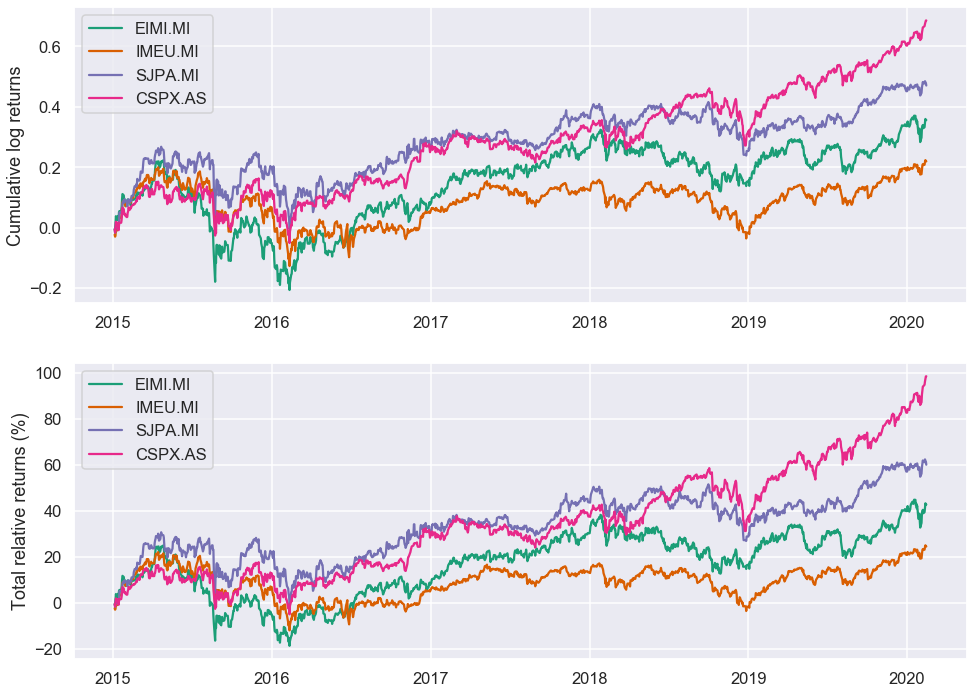

In [38]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

for c in log_returns:
    ax1.plot(log_returns.index, log_returns[c].cumsum(), label=str(c))
#symboldata = log_returns.loc[:, 'EIMI.MI']


ax1.set_ylabel('Cumulative log returns')
ax1.legend(loc='best')

for c in log_returns:
    ax2.plot(log_returns.index, 100*(np.exp(log_returns[c].cumsum()) - 1), label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')

plt.show()

In [45]:
# Last day returns. Make this a column vector
r_t = log_returns.tail(1).transpose()

# Weights as defined above
weights_vector = pd.DataFrame(1 / 4, index=r_t.index, columns=r_t.columns)
weights_vector

tickers = ['EIMI.MI', 'IMEU.MI', 'SJPA.MI', 'CSPX.AS']
weights = [0.3, 0.3, 0.1, 0.3 ]
weights_vector = pd.DataFrame(weights, tickers, columns=r_t.columns)
weights_vector

,2020-02-14
EIMI.MI,0.3
IMEU.MI,0.3
SJPA.MI,0.1
CSPX.AS,0.3


In [48]:

# Total log_return for the portfolio is:
portfolio_log_return = weights_vector.transpose().dot(r_t)

portfolio_log_return


weights_matrix = pd.DataFrame(weights, index = tickers , columns=data.columns)
weights_matrix.tail()

log_returns.head()
# Initially the two matrices are multiplied. Note that we are only interested in the diagonal, 
# which is where the dates in the row-index and the column-index match.
temp_var = weights_matrix.dot(log_returns.transpose())
temp_var.head().iloc[:, 0:5]


# The numpy np.diag function is used to extract the diagonal and then
# a Series is constructed using the time information from the log_returns index
portfolio_log_returns = pd.Series(np.diag(temp_var), index=log_returns.index)
portfolio_log_returns.tail()

ValueError: Shape of passed values is (4, 1), indices imply (4, 4)

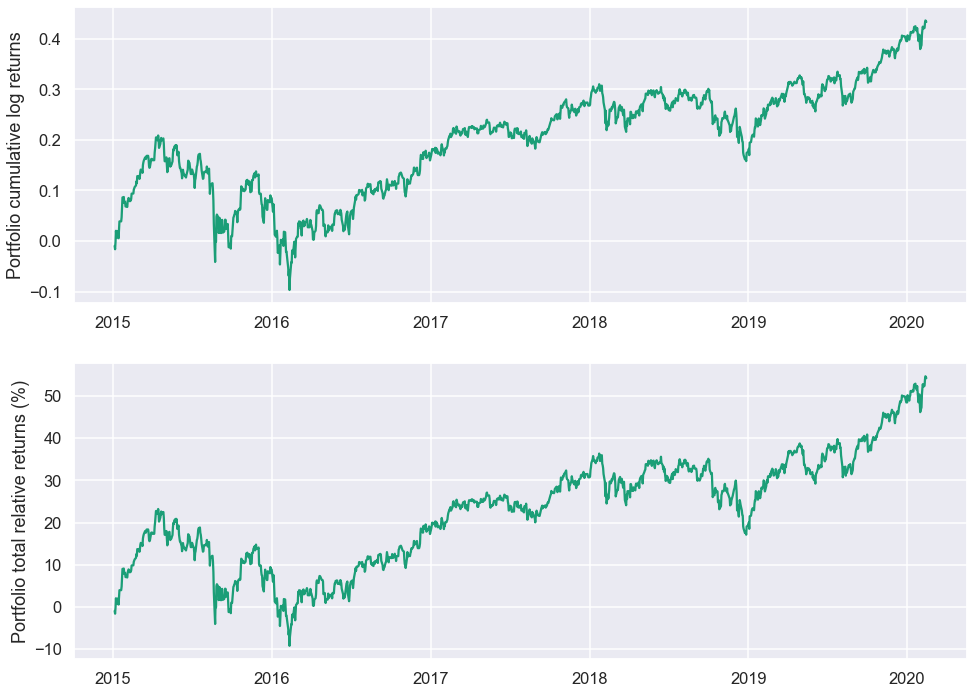

In [47]:
total_relative_returns = (np.exp(portfolio_log_returns.cumsum()) - 1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

ax1.plot(portfolio_log_returns.index, portfolio_log_returns.cumsum())
ax1.set_ylabel('Portfolio cumulative log returns')

ax2.plot(total_relative_returns.index, 100 * total_relative_returns)
ax2.set_ylabel('Portfolio total relative returns (%)')

plt.show()

In [42]:
# Calculating the time-related parameters of the simulation
days_per_year = 52 * 5
total_days_in_simulation = data.shape[0]
number_of_years = total_days_in_simulation / days_per_year

# The last data point will give us the total portfolio return
total_portfolio_return = total_relative_returns[-1]
# Average portfolio return assuming compunding of returns
average_yearly_return = (1 + total_portfolio_return)**(1 / number_of_years) - 1

print('Total portfolio return is: ' +
      '{:5.2f}'.format(100 * total_portfolio_return) + '%')
print('Average yearly return is: ' +
      '{:5.2f}'.format(100 * average_yearly_return) + '%')

Total portfolio return is: 54.22%
Average yearly return is:  8.79%
